# Part 3:

## ImageNet Classification

From 20000 classes present in ImageNet dataset, we have selected below 20 classes for this project:  
1. Acropolis
2. Aircraft
3. Anchor Chain
4. Arm chair
5. boa
6. computer keyboard
7. Cow
8. Cultivated land
9. Delivery Truck
10. Hawk
11. Jellyfish
12. lantern
13. Motorcycling
14. pay-phone
15. pygmy chimpanzee
16. rhinoceros beetle
17. seahorse
18. ski jumping
19. tiger cub
20. wineglass

In [12]:
!python /content/downloader.py  -data_root /content/drive/My\ Drive/ImageNet \
    -use_class_list True \
    -class_list n00451635 n01741943 n02403454 n01456756 n03173929 n01323068 n02738535\
    n02482650 n02709637 n03085013 n09260907 n00441073 n02174001 n03640988 n02676938 \
    n02686568 n04592099 n01910747 n03902125 n01605630\
    -images_per_class 1000 \
    -multiprocessing_workers 8

Picked the following clases: 
Count: 21
['ski jumping', 'ringneck snake', 'red maple', 'cultivated land', 'wineglass', 'anchor chain', 'pygmy chimpanzee', 'rhinoceros beetle', 'lantern', 'seahorse', 'delivery truck', 'electric guitar', 'acropolis', 'aircraft', 'Atlantic bottlenose dolphin', 'jellyfish', 'pay-phone', 'tiger cub', 'armchair', 'computer keyboard', 'hawk']
Multiprocessing workers: 8
  0% 0/21 [00:00<?, ?it/s]
Scraping stats:
STATS For class is_flickr:
 tried 243.0 urls with 214.0 successes
88.06584362139918% success rate for is_flickr urls 
0.02131249525836695 seconds spent per is_flickr successful image download
STATS For class not_flickr:
 tried 0.0 urls with 0.0 successes
STATS For class all:
 tried 243.0 urls with 214.0 successes
88.06584362139918% success rate for all urls 
0.02131287294013478 seconds spent per all successful image download

Scraping stats:
STATS For class is_flickr:
 tried 493.0 urls with 441.0 successes
89.45233265720081% success rate for is_flickr 

## Details to download specific classes of ImageNet dataset

In [ ]:
# n00451635,motorcycling,2038,976
# n01741943,boa,1214,1048
# n02403454,cow,1186,1175
# n01456756,seahorse,1272,1180
# n03173929,delivery truck,1335,673
# n01323068,tiger cub,1444,1038
# n02738535,armchair,1592,692
# n02482650,pygmy chimpanzee,1687,746
# n02709637,anchor chain,1055,728
# n03085013,computer keyboard,2225,1397
# n09260907,cultivated land,1234,652
# n00441073,ski jumping,1070,559
# n02174001,rhinoceros beetle,1216,751
# n03640988,lantern,1356,639
# n02676938,acropolis,1262,1047
# n02686568,aircraft,1510,929
# n04592099,wineglass,1640,1490
# n01910747,jellyfish,1635,1260
# n03902125,pay-phone,1662,1473
# n01605630,hawk,1826,1680



In [37]:
cd ./drive/My\ Drive/ImageNet

 acropolis/           'cultivated land'/  'pygmy chimpanzee'/
 aircraft/            'delivery truck'/   'rhinoceros beetle'/
'anchor chain'/        hawk/               seahorse/
 armchair/             jellyfish/         'ski jumping'/
 boa/                  lantern/           'tiger cub'/
'computer keyboard'/   motorcycling/       wineglass/
 cow/                  pay-phone/


In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#####

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

physical_devices------------- 1


## Mounting google drive to import datasets

In [1]:
import glob

# Importing drive method from colab for accessing google drive
from google.colab import drive

# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
folder_names = ['acropolis','aircraft','anchor chain','armchair','boa',\
                'computer keyboard','cow','cultivated land','delivery truck','hawk',\
                'jellyfish','lantern','motorcycling','pay-phone','pygmy chimpanzee','rhinoceros beetle',\
                'seahorse','ski jumping','tiger cub','wineglass']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from skimage import io,transform
import time
import glob
# a = 'tiger cub'

# getting list of 
# data_files = glob.glob("/content/drive/My Drive/ImageNet/"+a+"/*.jpg")

# len(data_files)

# img = mpimg.imread(data_files[0])
# print(img.shape)

# plt.imshow(img)
x_train = []
y_train = []
x_test = []
y_test = []

for i in folder_names:
  start = time.time()
  print(i)
  images = glob.glob("/content/drive/My Drive/ImageNet/"+i+"/*.jpg")[:500]
  count = 0
  imlist = (io.imread_collection(images))
  for img in imlist:
    count += 1
    img = transform.resize(img,(256,256,3))
    h = transform.rescale(img[:,:,0], 0.25, anti_aliasing=False)
    w = transform.rescale(img[:,:,1], 0.25, anti_aliasing=False)
    d = transform.rescale(img[:,:,2], 0.25, anti_aliasing=False)
    red_img = np.asarray([h,w,d])
    red_img = np.swapaxes(red_img,0,2)
    red_img = np.swapaxes(red_img,0,1)

    if count <=400:
      x_train.append(red_img)#/255)
      y_train.append(folder_names.index(i))
    else:
      x_test.append(red_img)#/255)
      y_test.append(folder_names.index(i))

  end = time.time()
  print("time",end-start)
  # print(len(images),i)

## Saving resized images to drive

In [29]:
# import cv2
# a = 'test'
# cv2.imwrite('/content/drive/My\ Drive/Resized_train_images/ddv.jpg', x_train[2])
# imsave('/content/drive/My\ Drive/Resized_train_images/ikj.jpg', x_train[2])

for i in range(len(x_train)):
  np.save('training_images',x_train[i])
# a = np.load('resized_image.npy')

for j in range(len(x_test)):
  np.save('testing_images',x_test[j])

for k in y_train:
  np.save('training_labels',k)

for l in y_test:
  np.save('testing_labels',l)

8000
acropolis


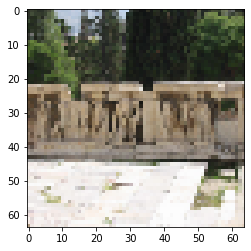

In [13]:
print(len(x_train))
print(folder_names[y_train[3]])
plt.imshow(x_train[3])
# x_train[3]

In [14]:
print(np.asarray(x_train).shape)

(8000, 64, 64, 3)


anchor chain


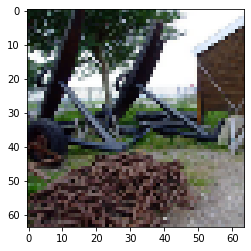

In [15]:
plt.imshow(x_train[1000])
print(folder_names[y_train[1000]])

## One Hot Encoding

In [17]:
import tensorflow as tf
num_classes = len(folder_names)
train_y = tf.keras.utils.to_categorical(y_train, num_classes)
test_y = tf.keras.utils.to_categorical(y_test, num_classes)
print(train_y.shape)

(8000, 20)


In [18]:
# # x_train = x_train.reshape(x_train.shape[0], n_rows, n_cols, 1)
# # x_test = testX.reshape(testX.shape[0], n_rows, n_cols, 1)
# # input_shape = (n_rows, n_cols, 1)

x_train = np.asarray(x_train) #.astype('float32')
x_test = np.asarray(x_test) #.astype('float32')
# # x_train *= 255
# # x_test *= 255
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)

# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

In [19]:
n_rows = x_train.shape[1]
n_cols = x_train.shape[2]
n_channels = x_train.shape[3]

input_shape = (n_rows, n_cols, n_channels)
input_shape

(64, 64, 3)

## Loading libraries

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import keras
from keras import backend as K
from tensorflow.keras.datasets import mnist
from __future__ import print_function
from tensorflow.keras.optimizers import RMSprop
from time import time
import numpy as np

Using TensorFlow backend.


# Applying Convolutional networks

## Building and applying ConvNet

In [21]:
model1 = Sequential()

model1.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))

model1.add(Conv2D(64, (3,3), activation='relu'))
# model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model1.add(MaxPooling2D(pool_size=(3,3)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model1.add(MaxPooling2D(pool_size=(3,3)))

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

In [22]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              # optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 58, 58, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 54, 54, 128)       409728    
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 54, 54, 256)       2

In [24]:
batch_size = 128
epochs = 16


history1 = model1.fit(x_train, train_y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,
                   callbacks=[reduce_lr])


Epoch 1/16
63/63 [==============================] - 45s 717ms/step - loss: 2.9341 - accuracy: 0.0740 - val_loss: 2.9200 - val_accuracy: 0.0950 - lr: 0.0010
Epoch 2/16
63/63 [==============================] - 41s 646ms/step - loss: 2.8423 - accuracy: 0.1130 - val_loss: 2.7809 - val_accuracy: 0.1260 - lr: 0.0010
Epoch 3/16
63/63 [==============================] - 41s 650ms/step - loss: 2.6671 - accuracy: 0.1688 - val_loss: 2.5852 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 4/16
63/63 [==============================] - 41s 651ms/step - loss: 2.5445 - accuracy: 0.2131 - val_loss: 2.4870 - val_accuracy: 0.2245 - lr: 0.0010
Epoch 5/16
63/63 [==============================] - 41s 650ms/step - loss: 2.4363 - accuracy: 0.2571 - val_loss: 2.3524 - val_accuracy: 0.2620 - lr: 0.0010
Epoch 6/16
63/63 [==============================] - 41s 651ms/step - loss: 2.3365 - accuracy: 0.2920 - val_loss: 2.2866 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 7/16
63/63 [==============================] - 41s 649ms/st

In [25]:
score1 = model1.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 2.0387184619903564
Test accuracy: 0.3944999873638153


## Confusion Matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Accuracy Score: 0.3944999873638153')

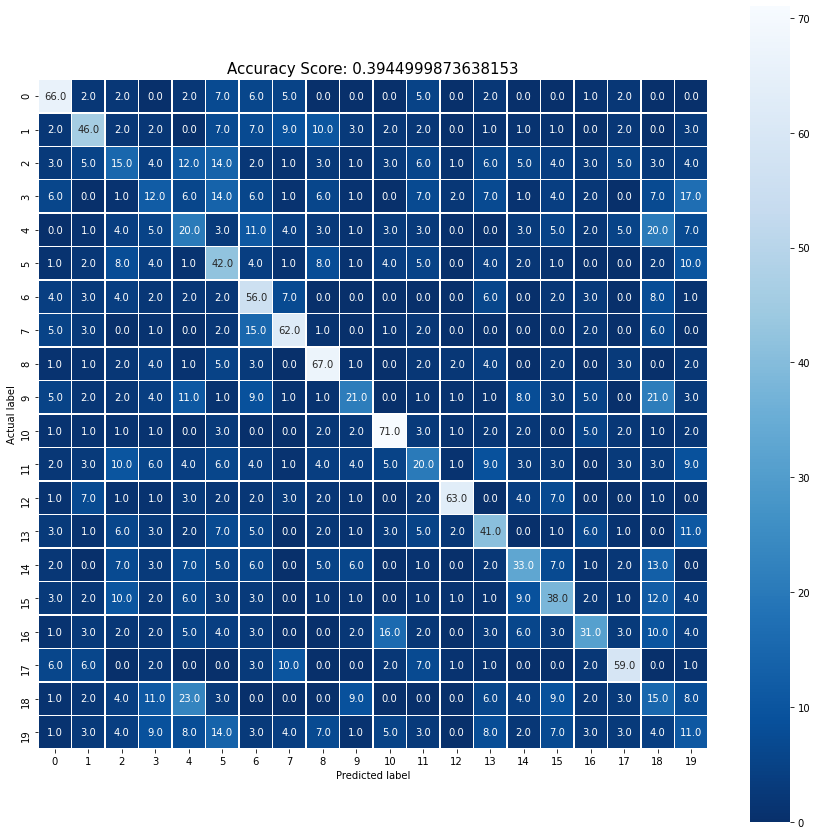

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model1.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score1[1])
plt.title(all_sample_title, size = 15)

## Train Vs Validation Accuracy

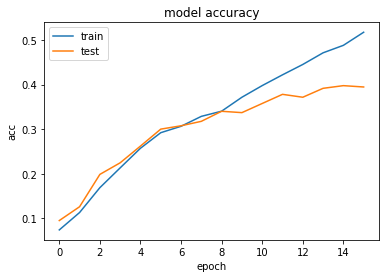

In [27]:
plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Plotting model loss

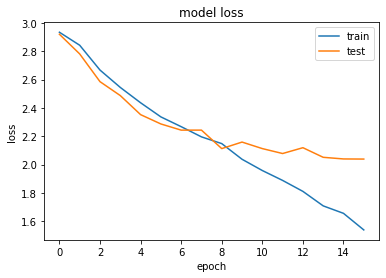

In [28]:
plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observation:

We can see that model is learning good even at the end of the 8th epoch. A gradual increase in accuracies of training and validation data can been observed. We can afford more number of epochs to the model to see if we can increase the validation accuracy.

# Applying previous ConvNet with increased number of epochs

In [30]:
model2 = Sequential()

model2.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))

model2.add(Conv2D(64, (3,3), activation='relu'))
# model1.add(Dropout(0.2))

model2.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model2.add(Dropout(0.2))

model2.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model2.add(Dropout(0.2))

model2.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [31]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              # optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [62]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 60, 60, 64)        73792     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 58, 58, 128)       73856     
_________________________________________________________________
dropout_13 (Dropout)         (None, 58, 58, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 54, 54, 128)       409728    
_________________________________________________________________
dropout_14 (Dropout)         (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 54, 54, 256)      

In [63]:
batch_size = 128
epochs = 64


history2 = model2.fit(x_train, train_y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,
                   callbacks=[reduce_lr])


Epoch 1/64
63/63 [==============================] - 41s 647ms/step - loss: 2.9655 - accuracy: 0.0660 - val_loss: 2.9317 - val_accuracy: 0.0855 - lr: 0.0010
Epoch 2/64
63/63 [==============================] - 41s 647ms/step - loss: 2.8769 - accuracy: 0.0976 - val_loss: 2.7874 - val_accuracy: 0.1175 - lr: 0.0010
Epoch 3/64
63/63 [==============================] - 41s 647ms/step - loss: 2.7525 - accuracy: 0.1343 - val_loss: 2.6543 - val_accuracy: 0.1680 - lr: 0.0010
Epoch 4/64
63/63 [==============================] - 41s 645ms/step - loss: 2.6697 - accuracy: 0.1619 - val_loss: 2.6152 - val_accuracy: 0.2100 - lr: 0.0010
Epoch 5/64
63/63 [==============================] - 41s 646ms/step - loss: 2.5516 - accuracy: 0.1991 - val_loss: 2.4713 - val_accuracy: 0.2285 - lr: 0.0010
Epoch 6/64
63/63 [==============================] - 41s 645ms/step - loss: 2.4331 - accuracy: 0.2504 - val_loss: 2.4439 - val_accuracy: 0.2530 - lr: 0.0010
Epoch 7/64
63/63 [==============================] - 41s 645ms/st

In [65]:
score2 = model2.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 6.01664924621582
Test accuracy: 0.3544999957084656


## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.3544999957084656')

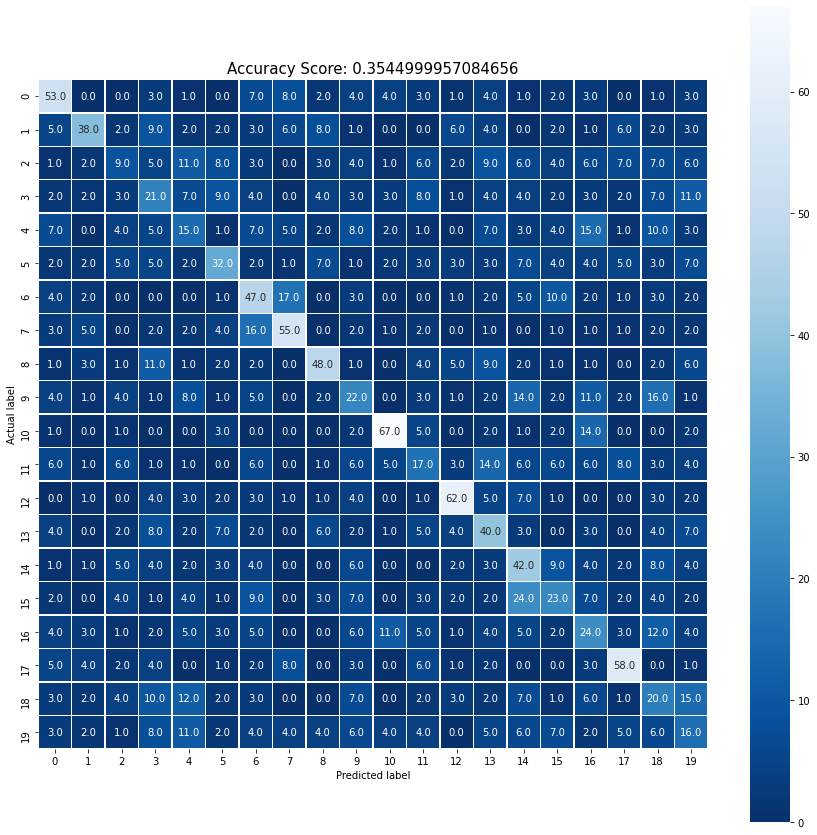

In [66]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model2.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score2[1])
plt.title(all_sample_title, size = 15)

## Training Accuracy Vs Validation Accuracy

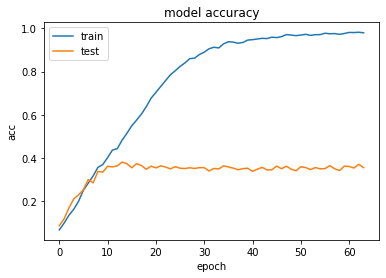

In [67]:
plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Plot for Model loss over time

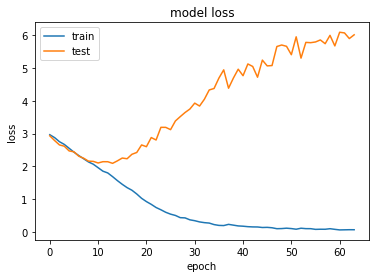

In [68]:
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observation:

It is apparent that increase in epochs had let the model overfit the training data. There was no increase in the validation accuracy and Model loss had been observed to be increasing over time which was not expected. This is a clear case of overfitting.

# Applying ConvNet with adding regularizers

In [75]:
model3 = Sequential()

model3.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))

model3.add(Conv2D(64, (3,3), activation='relu',kernel_regularizer='l2'))
# model1.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu',kernel_regularizer='l2'))
model3.add(Dropout(0.2))

model3.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu',kernel_regularizer='l2'))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu')) #,activity_regularizer=regularizers.l1_l2(0.01,0.01)))
model3.add(Dropout(0.2))

model3.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(num_classes, activation='softmax'))

In [76]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              # optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [72]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 60, 60, 64)        73792     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 58, 58, 128)       73856     
_________________________________________________________________
dropout_19 (Dropout)         (None, 58, 58, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 54, 54, 128)       409728    
_________________________________________________________________
dropout_20 (Dropout)         (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 54, 54, 256)      

In [77]:
batch_size = 128
epochs = 32


history3 = model3.fit(x_train, train_y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,
                   callbacks=[reduce_lr])


Epoch 1/32
63/63 [==============================] - 41s 646ms/step - loss: 3.7258 - accuracy: 0.0567 - val_loss: 3.0102 - val_accuracy: 0.0710 - lr: 0.0010
Epoch 2/32
63/63 [==============================] - 40s 642ms/step - loss: 2.9666 - accuracy: 0.0799 - val_loss: 2.9213 - val_accuracy: 0.0840 - lr: 0.0010
Epoch 3/32
63/63 [==============================] - 41s 645ms/step - loss: 2.8105 - accuracy: 0.1251 - val_loss: 2.7676 - val_accuracy: 0.1310 - lr: 0.0010
Epoch 4/32
63/63 [==============================] - 40s 643ms/step - loss: 2.6880 - accuracy: 0.1685 - val_loss: 2.5977 - val_accuracy: 0.2040 - lr: 0.0010
Epoch 5/32
63/63 [==============================] - 40s 639ms/step - loss: 2.6032 - accuracy: 0.1999 - val_loss: 2.5841 - val_accuracy: 0.1925 - lr: 0.0010
Epoch 6/32
63/63 [==============================] - 40s 635ms/step - loss: 2.5229 - accuracy: 0.2160 - val_loss: 2.5320 - val_accuracy: 0.2145 - lr: 0.0010
Epoch 7/32
63/63 [==============================] - 40s 634ms/st

In [78]:
score3 = model3.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 2.812533378601074
Test accuracy: 0.30550000071525574


## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.30550000071525574')

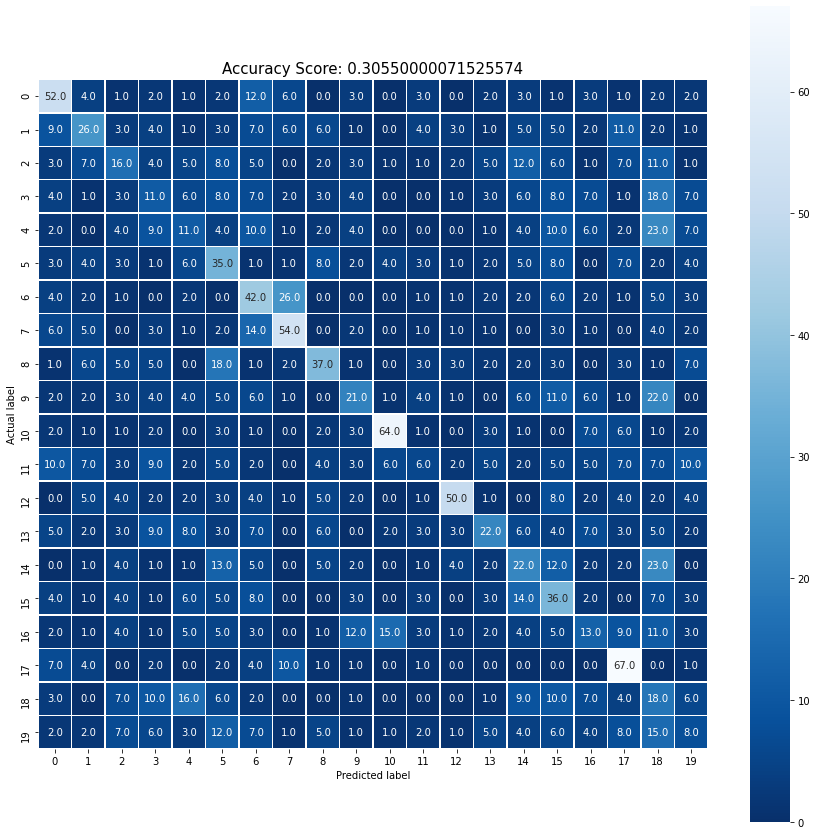

In [79]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model3.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score3[1])
plt.title(all_sample_title, size = 15)

## Training Accuracy Vs Validation Accuracy

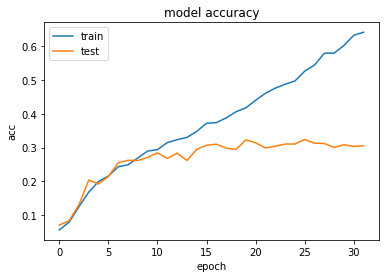

In [80]:
plt.figure()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Model Loss over time

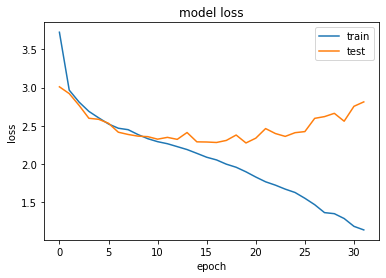

In [81]:
plt.figure()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observation:

We can see that regularizer had successfully regularized the learning of the model resulting in a controlled training accuracy increase. But this is not helping the validation accuracy increase from the previous best accuracy achieved.

# Applying Data Augumentation techniques:

## Using Image Data Generator for rotation, random cropping(zoom), horizontal flip and vertical flip. This is data augumentation function is then fitted to the recently formed training data

In [32]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=45,width_shift_range = 2,height_shift_range = 2, zoom_range = 0.1,
                             fill_mode = 'reflect',horizontal_flip=True,vertical_flip=True)
datagen.fit(x_train)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen1 = ImageDataGenerator(rotation_range=60, zoom_range = 0.1,
                             fill_mode = 'reflect',horizontal_flip=True,vertical_flip=True)
datagen1.fit(x_train)

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen2 = ImageDataGenerator(width_shift_range = 2,height_shift_range = 2,
#                              fill_mode = 'reflect')
# datagen2.fit(x_train)

## Each of the above training image is passing to the fucntion with batch size 1 to get the generated images which can be included into training data

In [33]:
x_batch = []
y_batch = []
for a,b in datagen.flow(x_train,y_train,batch_size =1):
    x_batch.append(np.array(np.expand_dims(a.squeeze(),-1),dtype = 'float64'))
    y_batch.append(int(b))
    if len(x_batch)>=8000:
      # print("its here")
      break
    

In [34]:
x_batch_1 = []
y_batch_1= []
for a,b in datagen1.flow(x_train,y_train,batch_size =1):
    x_batch_1.append(np.array(np.expand_dims(a.squeeze(),-1),dtype = 'float64'))
    y_batch_1.append(int(b))
    if len(x_batch_1)>=8000:
      # print("it can generate more the length of training data")
      break

In [102]:
# x_batch_2 = []
# y_batch_2 = []
# for a,b in datagen2.flow(x_train,y_train,batch_size =1):
#     x_batch_2.append(np.array(np.expand_dims(a.squeeze(),-1),dtype = 'float64'))
#     y_batch_2.append(int(b))
#     if len(x_batch_2)>=8000:
#       break

We have generated data of length 8000*3 (=24000) with the help of data augumentation techniques

## Checking the Augumentated data

seahorse


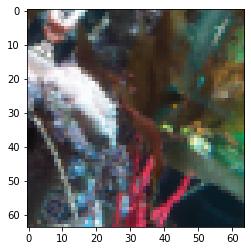

In [35]:
plt.imshow(x_batch_1[32][:,:,:,0])
print(folder_names[y_batch_1[32]])

lantern


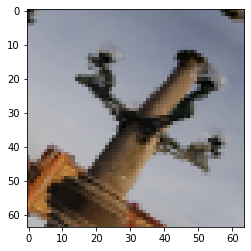

In [36]:
plt.imshow(x_batch[32][:,:,:,0])
print(folder_names[y_batch[32]])

In [37]:
len(x_batch_1)+ len(x_batch) # + len(x_batch_2) 

16000

## Getting all augumented data together

In [38]:
augumented_images = []
augumented_images.extend(x_batch)
augumented_images.extend(x_batch_1)
# augumented_images.extend(x_batch_2)
augumented_images = np.asarray(augumented_images)
print(augumented_images.shape)

augumented_labels = []
augumented_labels.extend(y_batch)
augumented_labels.extend(y_batch_1)
# augumented_labels.extend(y_batch_2)
augumented_labels = np.asarray(augumented_labels)
augumented_labels.shape

(16000, 64, 64, 3, 1)


(16000,)

In [39]:

augumented_images_shape = (augumented_images.shape[0],augumented_images.shape[1],augumented_images.shape[2],augumented_images.shape[3])
augumented_images = np.reshape(augumented_images,augumented_images_shape)
augumented_images.shape



(16000, 64, 64, 3)

In [40]:
for i in range(len(augumented_images)):
  np.save('augumented_images',augumented_images[i])
# a = np.load('resized_image.npy')

for k in augumented_labels:
  np.save('augumented_labels',k)



## One hot encoding

In [41]:
num_classes = len(folder_names)
augumented_labels = tf.keras.utils.to_categorical(augumented_labels, num_classes)

print(augumented_labels.shape)

(16000, 20)


## Making a final training data for our ConvNet model

In [42]:
final_xtrain = []
final_xtrain.extend(x_train)
# final_xtrain.extend(x_batch)
# final_xtrain.extend(x_batch_1)
# final_xtrain.extend(x_batch_2)
final_xtrain.extend(augumented_images)

final_xtrain = np.asarray(final_xtrain)
print(final_xtrain.shape)

final_ytrain = []
final_ytrain.extend(train_y)
final_ytrain.extend(augumented_labels)

final_ytrain = np.asarray(final_ytrain)
final_ytrain.shape

(24000, 64, 64, 3)


(24000, 20)

# Applying ConvNet to the augumented data

In [43]:
model5 = Sequential()

model5.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))

model5.add(Conv2D(64, (3,3), activation='relu'))
# model1.add(Dropout(0.2))

model5.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model5.add(Dropout(0.2))

model5.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model5.add(Dropout(0.2))

model5.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model5.add(MaxPooling2D(pool_size=(3,3)))
model5.add(Dropout(0.2))

model5.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model5.add(Dropout(0.2))

model5.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model5.add(Dropout(0.2))

model5.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model5.add(MaxPooling2D(pool_size=(3,3)))

model5.add(Flatten())

model5.add(Dense(256, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(num_classes, activation='softmax'))

In [44]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              # optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [45]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 60, 60, 64)        73792     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 58, 58, 128)       73856     
_________________________________________________________________
dropout_12 (Dropout)         (None, 58, 58, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 54, 54, 128)       409728    
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 54, 54, 256)      

In [46]:
batch_size = 128
epochs = 64


history5 = model5.fit(final_xtrain, final_ytrain,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,
                   callbacks=[reduce_lr])


Epoch 1/64
188/188 [==============================] - 117s 625ms/step - loss: 2.9146 - accuracy: 0.0795 - val_loss: 2.8585 - val_accuracy: 0.1020 - lr: 0.0010
Epoch 2/64
188/188 [==============================] - 118s 626ms/step - loss: 2.6788 - accuracy: 0.1612 - val_loss: 2.5672 - val_accuracy: 0.1930 - lr: 0.0010
Epoch 3/64
188/188 [==============================] - 117s 625ms/step - loss: 2.5103 - accuracy: 0.2213 - val_loss: 2.6196 - val_accuracy: 0.1745 - lr: 0.0010
Epoch 4/64
188/188 [==============================] - 117s 624ms/step - loss: 2.4058 - accuracy: 0.2581 - val_loss: 2.3730 - val_accuracy: 0.2510 - lr: 0.0010
Epoch 5/64
188/188 [==============================] - 117s 625ms/step - loss: 2.3091 - accuracy: 0.2898 - val_loss: 2.2824 - val_accuracy: 0.3065 - lr: 0.0010
Epoch 6/64
188/188 [==============================] - 117s 624ms/step - loss: 2.2439 - accuracy: 0.3113 - val_loss: 2.2715 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 7/64
188/188 [==========================

In [47]:
score5 = model5.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 5.527678489685059
Test accuracy: 0.35249999165534973


## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.35249999165534973')

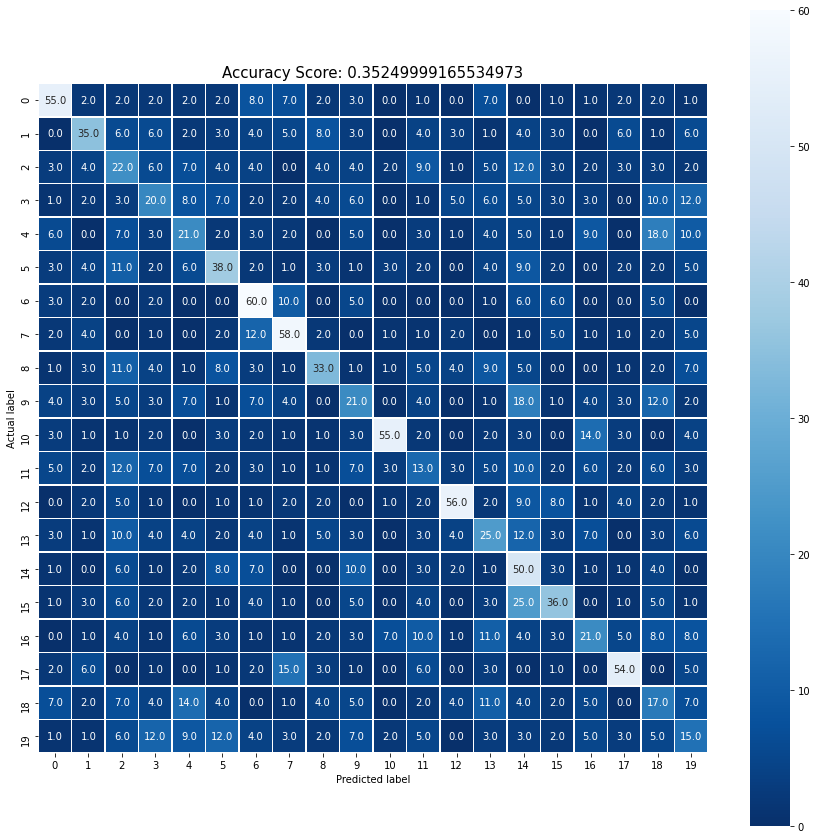

In [48]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model5.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score5[1])
plt.title(all_sample_title, size = 15)

## Training Accuracy Vs Validation Accuracy

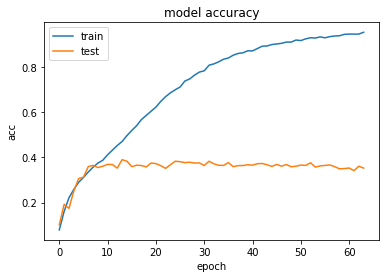

In [50]:
plt.figure()
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Plotting Model loss over time

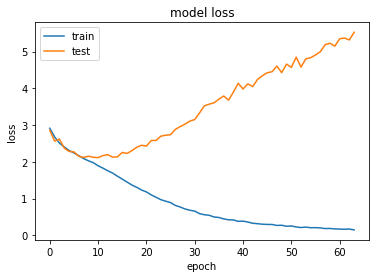

In [51]:
plt.figure()
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observations:


We can see that the model clearly overfitted the training data and testing accuracy stopped increasing after 9th epoch. Augumented data had helped model reach the previous best test accuracy a little earlier than the model fit on regular dataset.

## Comparing the Performance of each model

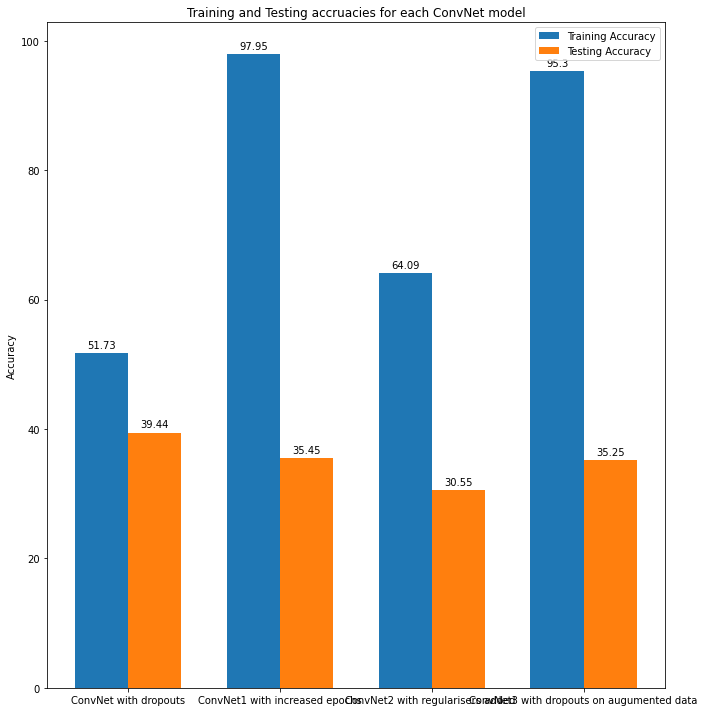

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

test1 = 39.44 #round(score1[1],3)
test2 = 35.45 # round(score2[1],3)
test3 = 30.55 # round(score3[1],3)
test4 = 35.25 # round(score5[1],3)

train1 = 51.73 # round(history1.history['accuracy'][-1],3)
train2 = 97.95 # round(history2.history['accuracy'][-1],3)
train3 = 64.09 # round(history3.history['accuracy'][-1],3)
train4 = 95.30 # round(history5.history['accuracy'][-1],3)

labels = ['ConvNet with dropouts', 'ConvNet1 with increased epochs', 'ConvNet2 with regularisers added ', 'ConvNet3 with dropouts on augumented data']
# training_accuracy = [round(history1.history['accuracy'][-1],3), round(history2.history['accuracy'][-1],3), round(history3.history['accuracy'][-1],3), round(history5.history['accuracy'][-1],3)]
training_accuracy = [train1,train2,train3,train4]
# testing_accuracy = [round(score1[1],3), round(score2[1],3), round(score3[1],3), round(score5[1],3)]
testing_accuracy = [test1,test2,test3,test4]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# plt.figure(figsize=[20,20])
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, training_accuracy, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, testing_accuracy, width, label='Testing Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing accruacies for each ConvNet model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Observation:

Apparently, few models have overfitted the training data and few have fit the training data good due to regularisation but failed to achieve better test accuracy than 39.44%. May be we have lost a lot of information from the original images when we resized them.   
From the Confusion Matrix of ConvNet model for augumented data, we can observe that 'Anchor chains' being classified as 'Boa' and model often predicted wineglass for armchair and vice versa. May be this can be made better if the images are resized to a bit higher size than now.

In [14]:
folder_names

['acropolis',
 'aircraft',
 'anchor chain',
 'armchair',
 'boa',
 'computer keyboard',
 'cow',
 'cultivated land',
 'delivery truck',
 'hawk',
 'jellyfish',
 'lantern',
 'motorcycling',
 'pay-phone',
 'pygmy chimpanzee',
 'rhinoceros beetle',
 'seahorse',
 'ski jumping',
 'tiger cub',
 'wineglass']

In [7]:
import numpy as np

# /content/drive/My\ Drive/ImageNet

training_images = np.load('/content/drive/My Drive/saved_imagenet_files_npy/training_images.npy')
testing_images = np.load('/content/drive/My Drive/saved_imagenet_files_npy/testing_images.npy')
training_labels = np.load('/content/drive/My Drive/saved_imagenet_files_npy/training_labels.npy')
testing_labels = np.load('/content/drive/My Drive/saved_imagenet_files_npy/testing_labels.npy')


In [10]:
training_labels.shape

()

(150, 150, 3)


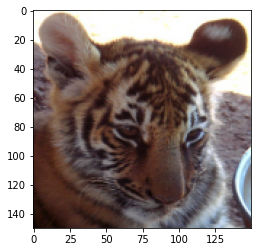

In [4]:
from skimage import io,transform
import glob
import matplotlib.image as mpimg

a = 'tiger cub'

# getting list of 
data_files = glob.glob("/content/drive/My Drive/ImageNet/"+a+"/*.jpg")

# len(data_files)

img = mpimg.imread(data_files[0])
# imlist = (io.imread_collection(imnames))

# res = np.zeros(shape=(1,3))
# for i in range(len(imlist)):
	# re-size all images to 256 x 256 x 3
img = transform.resize(img,(300,300,3))
# m = transform.rescale(img, 0.10, anti_aliasing=False)
m = transform.rescale(img[:,:,0], 0.50, anti_aliasing=False)
n = transform.rescale(img[:,:,1], 0.50, anti_aliasing=False)
b = transform.rescale(img[:,:,2], 0.50, anti_aliasing=False)
# plt.imshow(m)
# j = []
# j.append(m)
# j.append(n)
# j.append(b)
j = np.asarray([m,n,b])
j = np.swapaxes(j,0,2)
j = np.swapaxes(j,0,1)
print(j.shape)
plt.imshow(j)